Integrantes:
- Andres Rueda Velasco
- Roberto Ascencio Andrade
- Abigail Fernandez Huaricallo
- Felipe Revollo Steinlechner

In [51]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [52]:
SIZE = 150
EPOCH = 40
SEED = 10
BATCH_SIZE = 32

In [53]:
# cargando datos
train_data = './train'
test_data = './test'
val_data = './valid'

In [54]:
# preprocesamiento de datos
pre_procesing = ImageDataGenerator(
    rescale = 1./255, # Reescalar los valores de píxeles a un rango de 0 a 1
    zoom_range=0.05, # Rango de zoom aleatorio
    shear_range=0.1,  # Intensidad en la distorsión de corte (shear) aleatoria           
    horizontal_flip=True,  # Volteo horizontal aleatorio       
    fill_mode='nearest' # Rellenar pixeles vacios con el del vecino más cercano
)

In [55]:
train_generator = pre_procesing.flow_from_directory(
    train_data,
    target_size = (SIZE, SIZE),
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    seed=SEED,
    shuffle=True
)
test_generator = pre_procesing.flow_from_directory(
    test_data,
    target_size = (SIZE, SIZE),
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    seed=SEED,
    shuffle=True
)
val_generator = pre_procesing.flow_from_directory(
    val_data,
    target_size = (SIZE, SIZE),
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    seed=SEED,
    shuffle=True
)

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [56]:
print(f'El tamaño de los datos de entrenamiento es: {train_generator.n} y tiene {train_generator.num_classes} clases')
print(f'El tamaño de los datos de prueba es: {test_generator.n} y tiene {test_generator.num_classes} clases')
print(f'El tamaño de los datos de validación es: {val_generator.n} y tiene {val_generator.num_classes} clases')

El tamaño de los datos de entrenamiento es: 3208 y tiene 20 clases
El tamaño de los datos de prueba es: 100 y tiene 20 clases
El tamaño de los datos de validación es: 100 y tiene 20 clases


In [57]:
# Obtendiendo un lote de datos de entrenamiento
x_batch, y_batch = train_generator.next()

In [58]:
# Obteniend el nombre de las clases mediante los indices
class_names = list(train_generator.class_indices.keys())

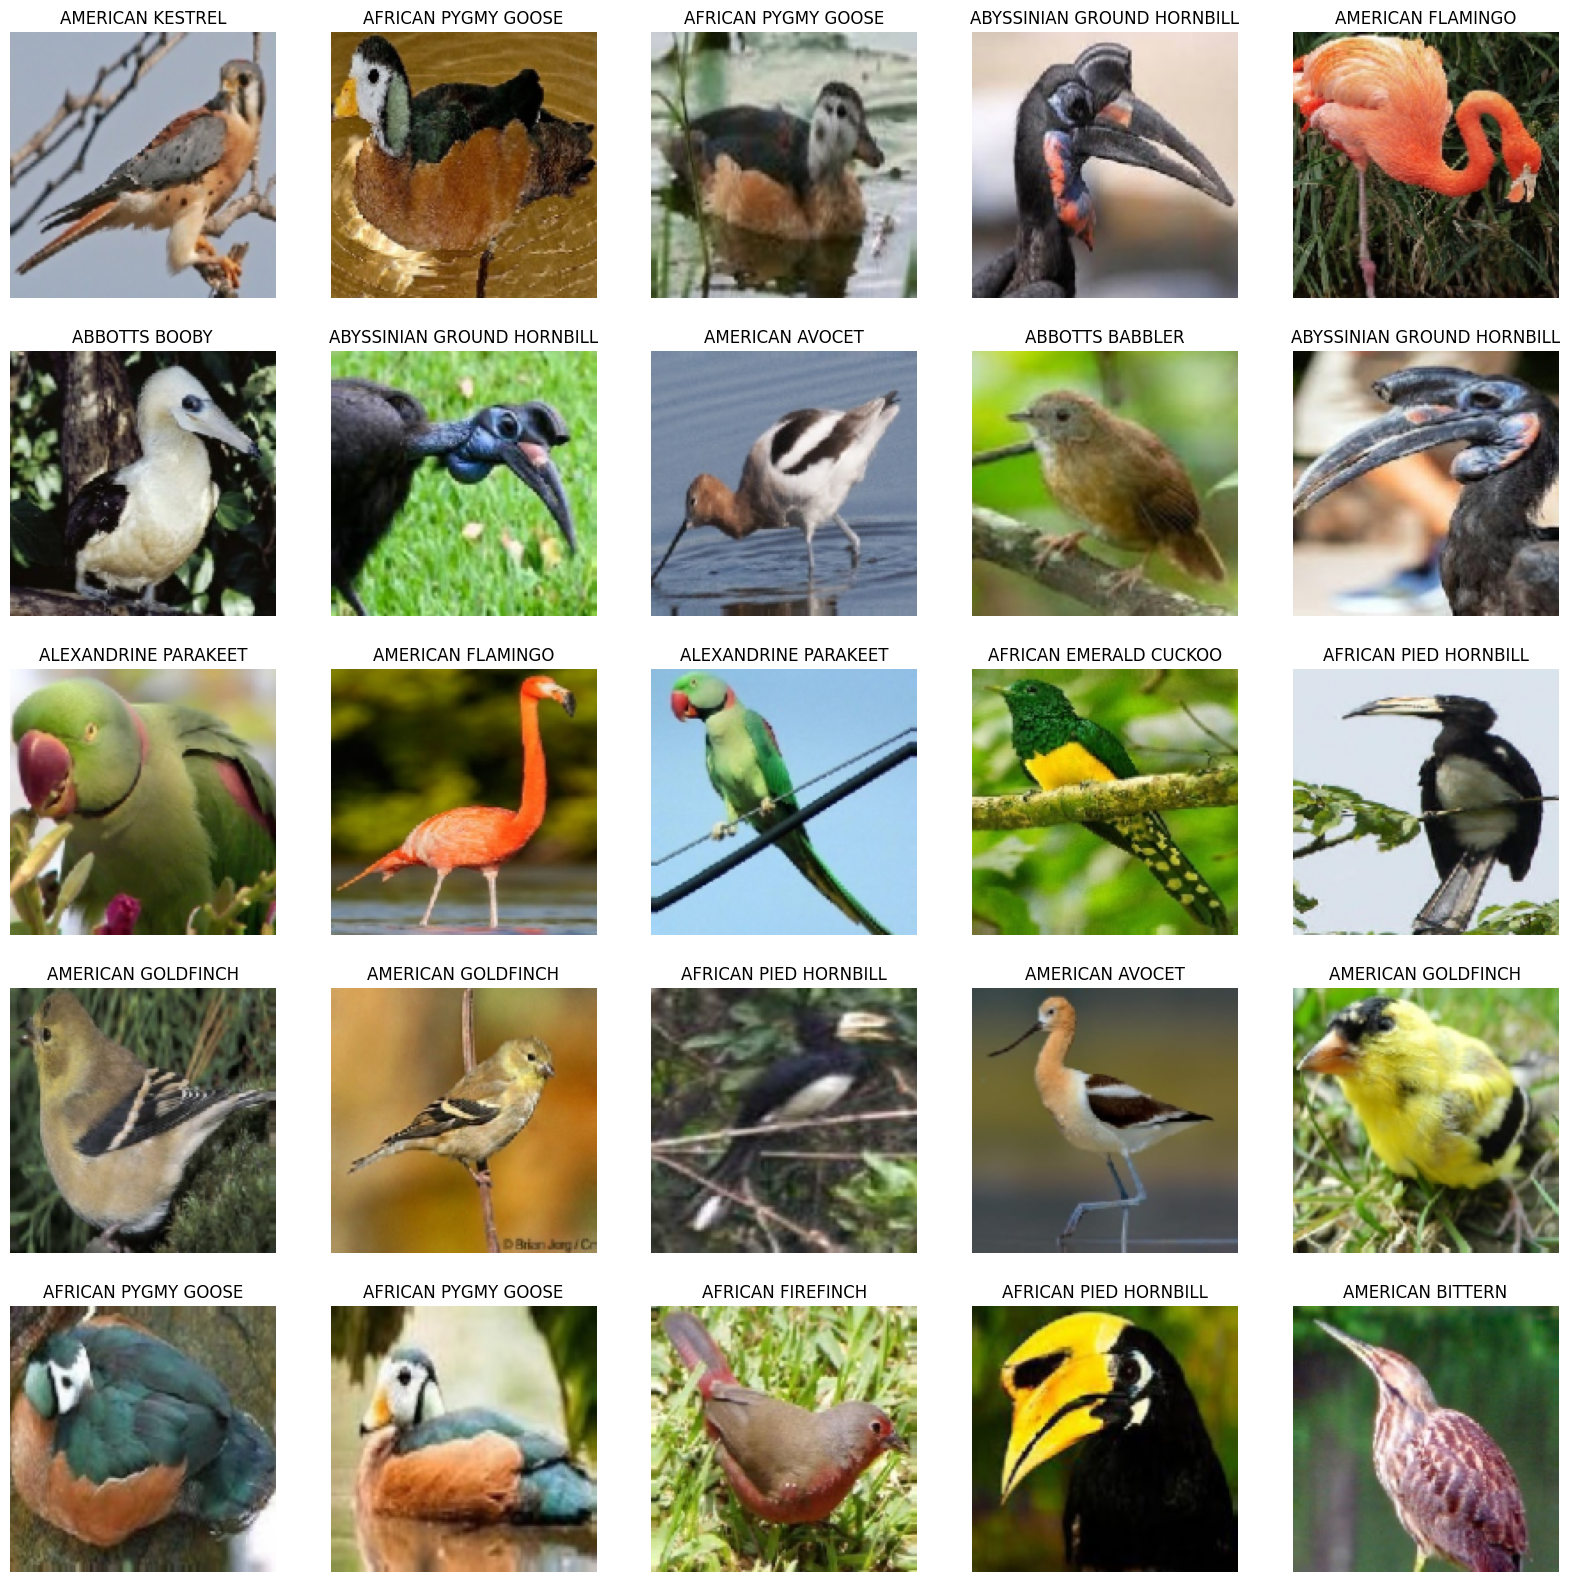

In [59]:
# Visualizando las primeras 25 imágenes
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
    plt.title(class_names[y_batch[i].argmax()]) 
plt.show()

In [60]:
#Creando una CNN

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu',))
model.add(Dense(units=20,activation='softmax'))

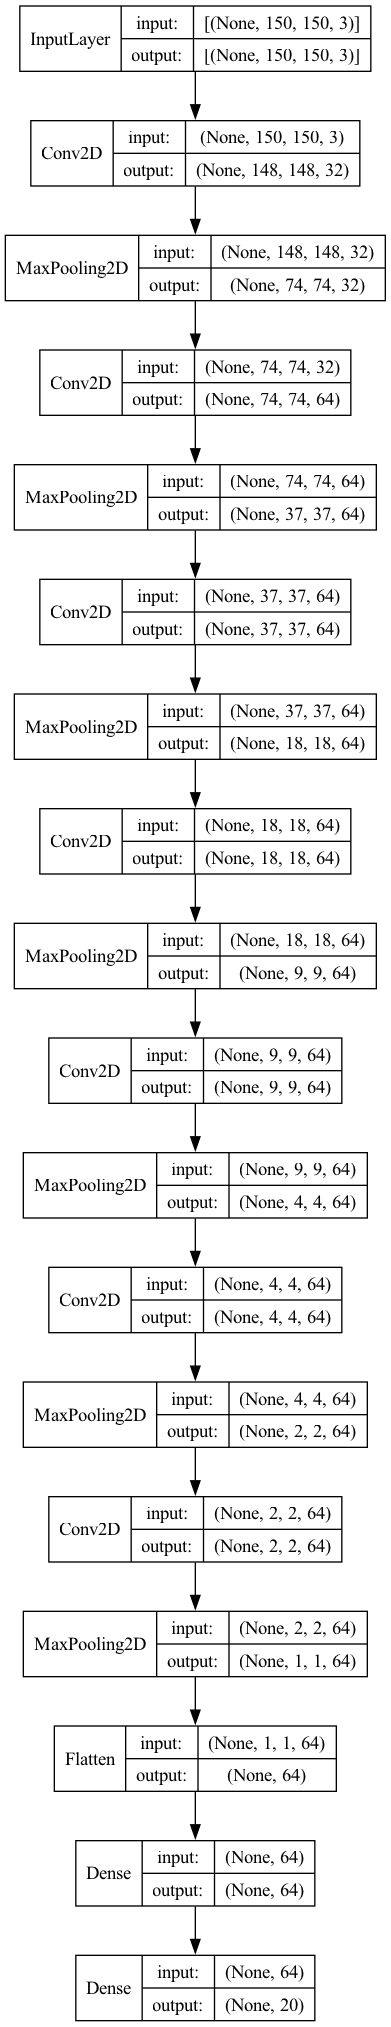

In [61]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [62]:
# Construyendo el modelo
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 18, 18, 64)       

In [63]:
#Calculando el modelo
history = model.fit( 
                    train_generator, 
                    epochs=EPOCH,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    )

Epoch 1/40
101/101 [==============================] - 23s 219ms/step - loss: 2.9525 - accuracy: 0.0627 - val_loss: 2.7989 - val_accuracy: 0.0800
Epoch 2/40
101/101 [==============================] - 22s 218ms/step - loss: 2.5760 - accuracy: 0.1699 - val_loss: 2.2700 - val_accuracy: 0.2800
Epoch 3/40
101/101 [==============================] - 22s 221ms/step - loss: 2.1709 - accuracy: 0.2958 - val_loss: 1.9352 - val_accuracy: 0.3200
Epoch 4/40
101/101 [==============================] - 22s 217ms/step - loss: 1.8854 - accuracy: 0.3903 - val_loss: 1.6370 - val_accuracy: 0.4400
Epoch 5/40
101/101 [==============================] - 22s 214ms/step - loss: 1.6784 - accuracy: 0.4451 - val_loss: 1.5476 - val_accuracy: 0.5200
Epoch 6/40
101/101 [==============================] - 24s 235ms/step - loss: 1.5192 - accuracy: 0.5168 - val_loss: 1.4851 - val_accuracy: 0.4700
Epoch 7/40
101/101 [==============================] - 24s 236ms/step - loss: 1.3374 - accuracy: 0.5701 - val_loss: 1.2911 - val_ac

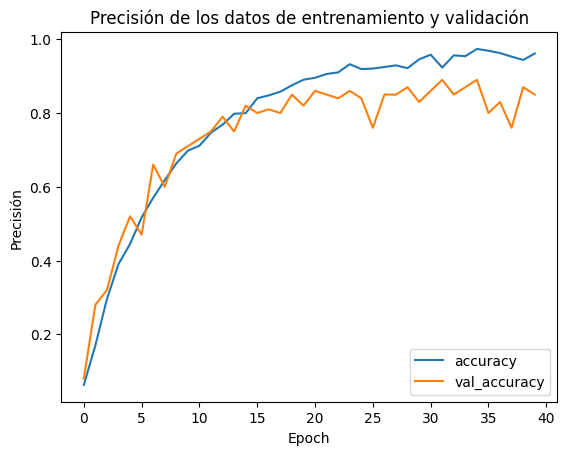

In [66]:
# Grafica para evaluar la precision del modelo

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Precisión de los datos de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()


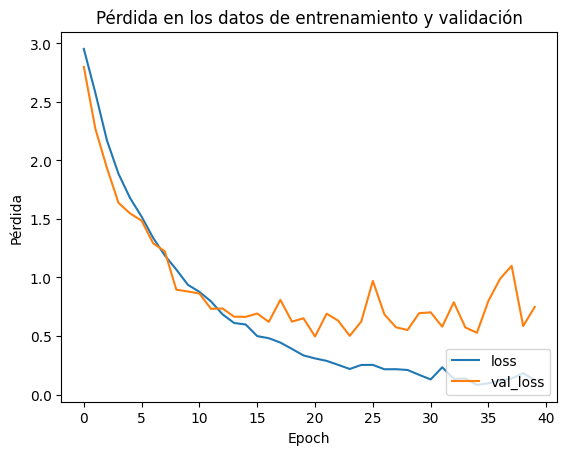

In [67]:
# Grafica para evaluar la perdida del modelo
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Pérdida en los datos de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='lower right')
plt.show()

In [68]:
# Obteniendo la precision y perdida del modelo usando el conjunto de prueba
test_loss, test_accurate = model.evaluate(test_generator)


4/4 [==============================] - 0s 60ms/step - loss: 0.9051 - accuracy: 0.8000


In [69]:
print(f'Precisión del modelo usando los datos de prueba: {round(test_accurate,3)}')

Precisión del modelo usando los datos de prueba: 0.8


In [70]:
#Obteniendo las imagenes de /images to predict para poder predecir usando nuestro modelo

image_directory = './images to predict'
img_size = SIZE

images = [] 

for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0



In [ ]:
# Realizando las predicciones usando el modelo e imagenes no vistas por el modelo
predictions = model.predict(images)

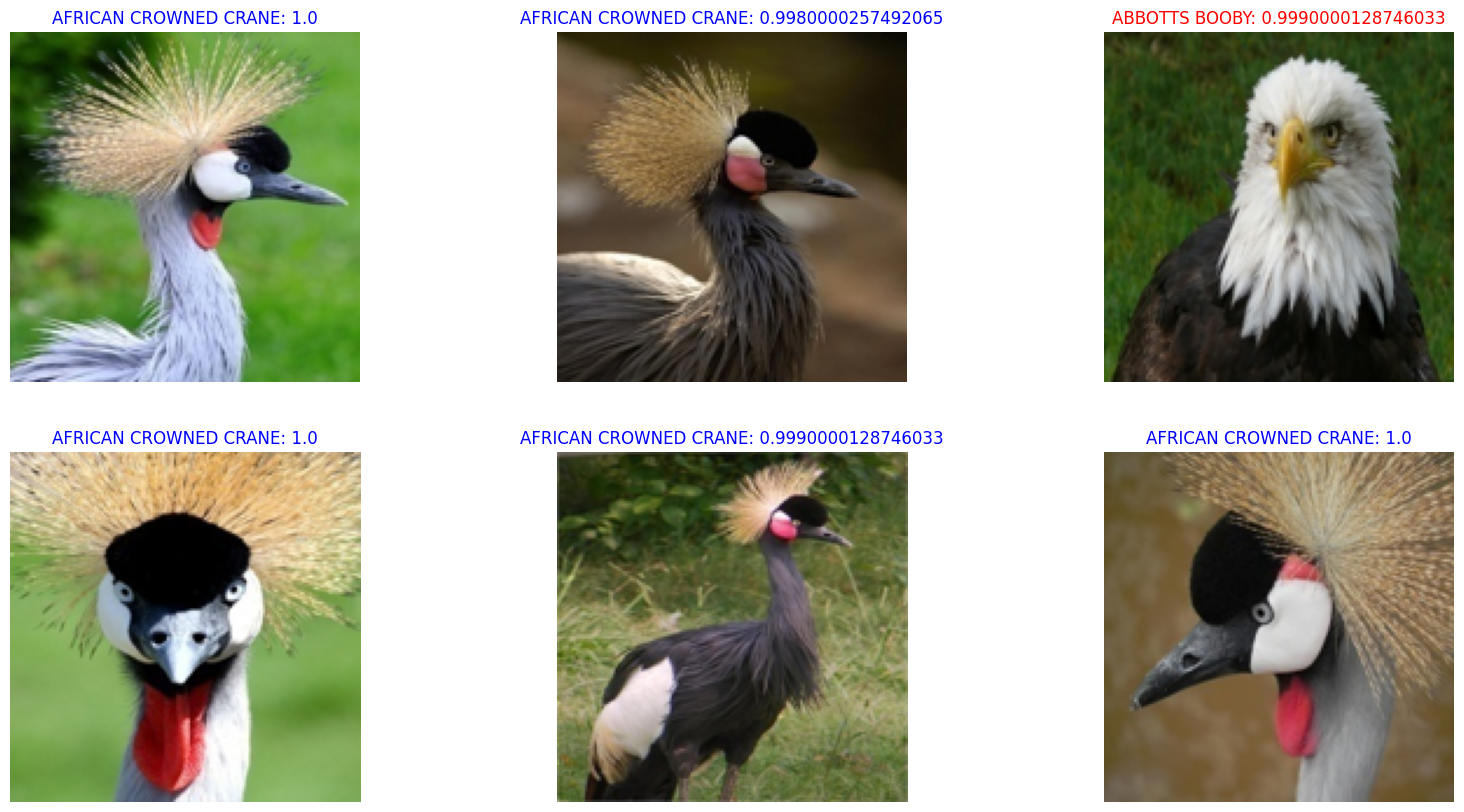

In [72]:
# Graficando nuestros resultados, Mencionar que el modelo nunca fue entrenado con imagenes de aguila (La imagen 6 que esta dentro de la images to predict). El resto de imagenes pertenecen al mismo tipo es decir al African Crowned Crane
plt.figure(figsize=(20, 10))
for i in range(0, len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    predicted_class = np.argmax(predictions[i])
    class_probability = np.round(predictions[i, predicted_class], decimals=3)
    if class_names[predicted_class] == 'AFRICAN CROWNED CRANE' and class_probability > 0.50:
        color = 'blue'
    else:
        color = 'red'
    plt.title(f'{class_names[predicted_class]}: {class_probability}', color=color)